# Drosophila Circadian Clock

This is a model of the oscillating Drosophila period protein (PER). This model is based on the model introduced in the following publication:

In [1]:
from ecell4.datasource import citation
citation(8587874)

Goldbeter A, A model for circadian oscillations in the Drosophila period protein (PER). *Proceedings. Biological sciences*, **1362**(261), 319-24, 1995. [10.1098/rspb.1995.0153](https://doi.org/10.1098/rspb.1995.0153). PubMed PMID: [8587874](https://www.ncbi.nlm.nih.gov/pubmed/8587874).

In [2]:
%matplotlib inline
from ecell4.prelude import *

In [3]:
with reaction_rules():
    ~M > M | 0.76 / (1 + Pn ** 3)
    M > ~M | 0.65 * M / (0.5 + M)
    ~P0 > P0 | 0.38 * M
    P0 == P1 | (3.2 * P0 / (2 + P0), 1.58 * P1 / (2 + P1))
    P1 == P2 | (5 * P1 / (2 + P1), 2.5 * P2 / (2 + P2))
    P2 == Pn | (1.9, 1.3)
    P2 > ~P2 | 0.95 * P2 / (0.2 + P2)

m = get_model()

In [4]:
y0 = {"M": 3.61328202e-01, "Pn": 6.21367e-01, "P0": 3.01106835e-01, "P1": 3.01106835e-01, "P2": 3.61328202e-01}
ret = run_simulation(100, ndiv=400, model=m, y0=y0)

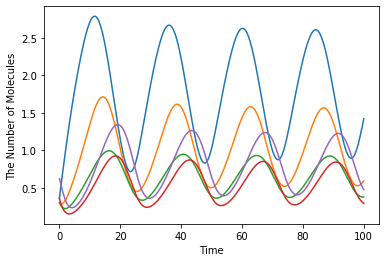

In [5]:
ret

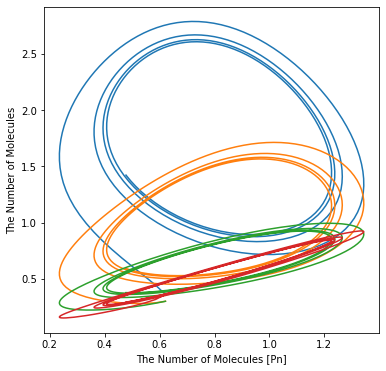

In [6]:
ret.plot(x="Pn", y=["M", "P0", "P1", "P2"], figsize=[6.0, 6.0])